In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')



In [34]:
data = pd.read_csv(r'winequality-red.csv',delimiter=";")

In [35]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [36]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'quality'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

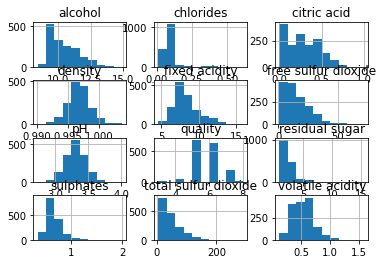

In [37]:
data.hist()


<AxesSubplot:>

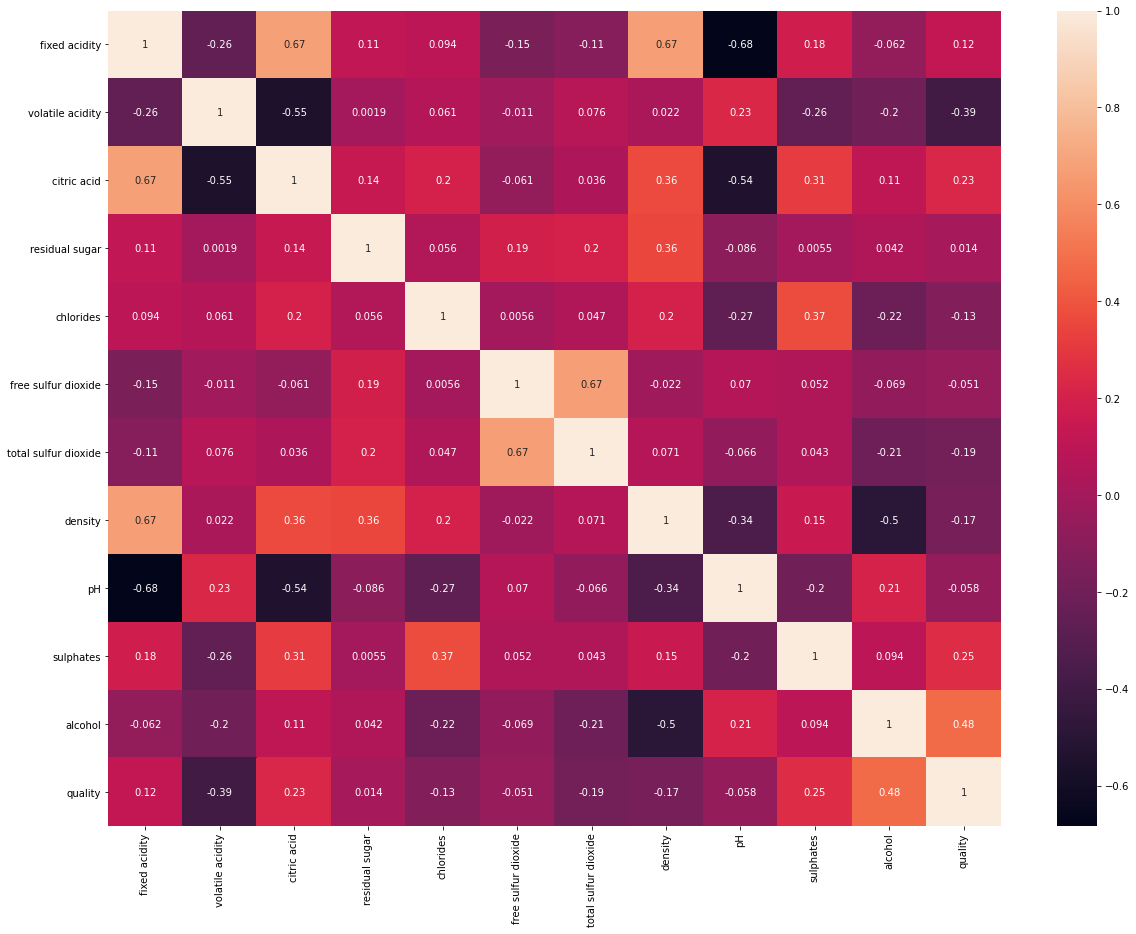

In [38]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot = True)



In [39]:
#sns.pairplot(data)

In [40]:
data_df1 = data['pH']


In [41]:
for i in data['pH']:
    if i >=3.4 and i<3.6:
        data_df1.replace(i,"Yes",inplace = True)
    elif i < 3.4:
        data_df1.replace(i,"low pH",inplace = True)
    else:
        data_df1.replace(i,"high pH",inplace = True)


In [42]:
data_df1

0          Yes
1       low pH
2       low pH
3       low pH
4          Yes
         ...  
1594       Yes
1595       Yes
1596       Yes
1597       Yes
1598    low pH
Name: pH, Length: 1599, dtype: object

In [43]:
data['res'] = pd.Series(data_df1)

In [44]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,res
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,Yes,0.56,9.40,5,Yes
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,low pH,0.68,9.80,5,low pH
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,low pH,0.65,9.80,5,low pH
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,low pH,0.58,9.80,6,low pH
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,Yes,0.56,9.40,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,Yes,0.58,10.50,5,Yes
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,Yes,0.76,11.20,6,Yes
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,Yes,0.75,11.00,6,Yes
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,Yes,0.71,10.20,5,Yes


In [45]:
from sklearn.preprocessing import LabelEncoder
data['res'] = LabelEncoder().fit_transform(data['res'])

In [46]:
data['res'].unique()

array([0, 2, 1])

In [47]:
x = data.drop(['pH','res','quality'],axis = 1)


In [48]:
y = data['res']


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [50]:
from xgboost import XGBClassifier
regr = XGBClassifier()
regr.fit(x_train,y_train)
pred = regr.predict(x_test)


<AxesSubplot:>

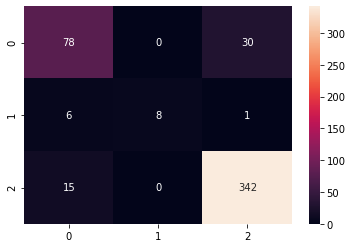

In [51]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred),annot = True,fmt = 'g',cbar = True)

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.8916666666666667


In [53]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)





100%|██████████| 29/29 [00:03<00:00,  9.04it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             0.85               0.74    None      0.86   
BaggingClassifier                  0.86               0.74    None      0.86   
XGBClassifier                      0.89               0.74    None      0.89   
LabelSpreading                     0.84               0.71    None      0.84   
LabelPropagation                   0.84               0.71    None      0.84   
ExtraTreesClassifier               0.89               0.69    None      0.89   
RandomForestClassifier             0.89               0.69    None      0.88   
LGBMClassifier                     0.89               0.67    None      0.88   
QuadraticDiscriminantAnalysis      0.76               0.65    None      0.78   
KNeighborsClassifier               0.81               0.62    None      0.81   
NearestCentroid                    0.59 

xg boost link 
https://machinelearningmastery.com/xgboost-for-imbalanced-classification/#:~:text=The%20XGBoost%20algorithm%20is%20effective,over%20the%20model%20training%20procedure.
pycharot

In [54]:
data = pd.read_csv(r'C:\Users\Vijay Challa\Downloads\Telegram Desktop\winequality-white (2).csv',delimiter = ";")

In [55]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [56]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [57]:
y = data['quality']
x = data.drop('quality',axis = 1)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [59]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

<AxesSubplot:>

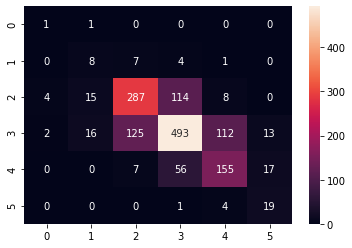

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(pred,y_test),annot = True,fmt='g',cbar = True)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.6551020408163265

In [62]:
from lazypredict.Supervised import LazyClassifier



In [63]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)


100%|██████████| 29/29 [00:15<00:00,  1.90it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelPropagation                   0.62               0.46    None      0.62   
LabelSpreading                     0.62               0.46    None      0.62   
XGBClassifier                      0.66               0.45    None      0.65   
ExtraTreesClassifier               0.68               0.43    None      0.67   
BaggingClassifier                  0.65               0.43    None      0.64   
RandomForestClassifier             0.68               0.42    None      0.67   
DecisionTreeClassifier             0.59               0.42    None      0.59   
LGBMClassifier                     0.64               0.41    None      0.63   
ExtraTreeClassifier                0.59               0.39    None      0.59   
QuadraticDiscriminantAnalysis      0.48               0.33    None      0.47   
KNeighborsClassifier               0.55 